# Neo4J Tweet Streaming Analysis

## Import Libraries

In [47]:
import numpy as np
import pandas as pd
from py2neo import Graph, Node, Relationship, Database
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly
import plotly.graph_objs as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

## Load Graph

In [48]:
db = Database("bolt://localhost:7687", user="neo4j", password="abc123")
g = Graph("bolt://localhost:7687", user="neo4j", password="abc123")

## Graph Queries

In [49]:
tweets = g.run("MATCH (t: Tweet) RETURN t.screen_name AS user, t.sentiment AS sentiment, t.polarity AS polarity, t.text AS text").to_data_frame()

In [50]:
hashtags_raw_data = g.run("MATCH (t: Tweet) --> (h: Hashtag) RETURN h.name AS hashtag").to_data_frame()

In [51]:
all_data = g.run("MATCH (t: Tweet) --> (h: Hashtag) RETURN t.screen_name AS user, t.sentiment AS sentiment, t.polarity AS polarity, t.text AS text, h.name AS hashtag").to_data_frame()

In [52]:
counts = hashtags_raw_data['hashtag'].value_counts()

In [53]:
counts

coronavirus       4339
GeorgeFloyd       3537
Coronavirus       2336
COVID19           1780
Trump             1471
                  ... 
websitecontent       1
SADIK                1
CriseSanitaire       1
tests                1
onlyFans             1
Name: hashtag, Length: 7416, dtype: int64

In [54]:
hashtag_counts_df = pd.DataFrame({'hashtag': list(counts.index), 'count': counts}).reset_index(drop=True)

In [55]:
hashtag_counts_df = hashtag_counts_df.sort_values(by=['count'], ascending=False)
hashtag_counts_df

hashtag  count
0         coronavirus   4339
1         GeorgeFloyd   3537
2         Coronavirus   2336
3             COVID19   1780
4               Trump   1471
...               ...    ...
4266         Genética      1
4265    TimeTravelers      1
4264  PersonalFinance      1
4263          anarchy      1
7415         onlyFans      1

[7416 rows x 2 columns]

In [56]:
all_data

user sentiment  polarity  \
0         _badbibigii_   neutral    0.0000   
1              _pnppbr   neutral    0.0000   
2         _JesusOnline  positive    0.2732   
3      Jam1Hospitality   neutral    0.0000   
4           TrueStats2   neutral    0.0000   
...                ...       ...       ...   
37371  ricardo_ik_ahau  positive    0.6264   
37372  truepatriotism3   neutral    0.0000   
37373            kbris  negative   -0.1027   
37374      HarrisLorre  negative   -0.2960   
37375     davidbardeen  negative   -0.2057   

                                                    text          hashtag  
0      RT @pipob69: น้องเรียนรร.อินเตอร์ บอกตอนพวก #B...              BLM  
1      RT @pipob69: น้องเรียนรร.อินเตอร์ บอกตอนพวก #B...              BLM  
2      #God #Jesus #GreatAwakening #StopTheViolence #...              BLM  
3      #BLM but they are not the only race to experie...              BLM  
4      #worldsgonemad #BLM #BlackLivesMatter #British...              BLM  
...                                                  ...              ...  
37371  RT @GEO_Henosis: Not surprisingly, it's a #GIS...              GIS  
37372  @GOP @WhiteHouse @HouseGOP @SenateGOP @VP\n#Tr...   VoteRepublican  
37373  #DrScottGottlieb warns U.S. #coronavirus hot s...  DrScottGottlieb  
37374  RT @KristenClarkeJD: This is #McKenzieCochran\...  McKenzieCochran  
37375  RT @Rosie: trump is not well #DementiaDonald h...   DementiaDonald  

[37376 rows x 5 columns]

## Visualizations

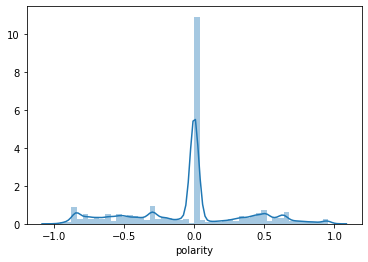

In [57]:
sns.distplot(tweets['polarity'])

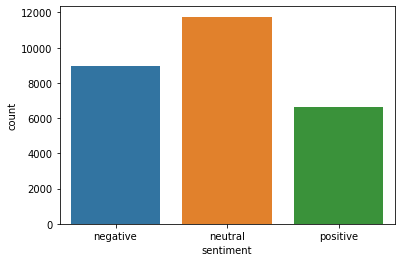

In [58]:
sns.countplot(tweets['sentiment'])

In [59]:
group_labels = ['tweet polarity'] # name of the dataset

fig = ff.create_distplot([tweets['polarity']], group_labels, bin_size=0.25)
fig.show()

In [60]:
tweets

user sentiment  polarity  \
0      DannyCo28192881  negative   -0.3199   
1             bndrbtdr   neutral    0.0000   
2            Harry7864  positive    0.5106   
3          ICarly_xoxo  positive    0.6369   
4        flancochohija  negative   -0.7650   
...                ...       ...       ...   
27315   Mountaineer901  positive    0.7096   
27316        scharlezs   neutral    0.0000   
27317   brookselaine70   neutral    0.0000   
27318    MrAntonioSosa  positive    0.7351   
27319          j0stinm   neutral    0.0000   

                                                    text  
0      RT @united__UK: Well the support #BLM is getti...  
1      RT @okaz_brk: لجنة بالحزب الجمهوري تدعو لتصنيف...  
2      RT @bbybrandz: I wish we lived in an advanced ...  
3      RT @Blklivesmatter: You have changed us foreve...  
4      RT @RepStephMurphy: THREAD: I'm cosponsoring t...  
...                                                  ...  
27315                                                  💗  
27316  Veo que el tema de la moratoria está hablándos...  
27317                                  RT @tedlieu: Nope  
27318  @KathrynPeyton @DamonLinker Depends. Compared ...  
27319  RT @mefeater: Tamir Rice would’ve been graduat...  

[27320 rows x 4 columns]

In [61]:
tweets['count_col'] = tweets['sentiment'].apply(lambda x: 1)
fig = px.pie(tweets, values='count_col', names='sentiment', title='Sentiments of Incoming Tweets')
fig.show()

In [62]:
sentiment_counts = tweets['sentiment'].value_counts()
sentiment_counts = pd.DataFrame({'sentiment': list(sentiment_counts.index), 'count': sentiment_counts}).reset_index(drop=True)

In [63]:
sentiment_counts

sentiment  count
0   neutral  11760
1  negative   8952
2  positive   6608

In [64]:
trace = go.Pie(labels = sentiment_counts['sentiment'], values = sentiment_counts['count'])
data = [trace]
fig = go.Figure(data = data)
fig.update_layout(title={
        'text': "Overall Tweet Sentiment",
        'x': 0.5,
        'y': 0.9})
fig.show()

In [65]:
hashtag_counts_df['count']

0       4339
1       3537
2       2336
3       1780
4       1471
        ... 
4266       1
4265       1
4264       1
4263       1
7415       1
Name: count, Length: 7416, dtype: int64

In [66]:
hashtags = list(hashtag_counts_df['hashtag'][:10])
counts = list(hashtag_counts_df['count'][:10])
fig = go.Figure(data=[go.Bar(
            x=hashtags, y=counts,
            text=counts,
            textposition='auto',
        )])

fig.show()

## Hashtag Word Cloud

In [74]:
shuffled_hashtags = hashtags_raw_data.sample(frac=1).reset_index(drop=True)
shuffled_hashtags = shuffled_hashtags['hashtag'].apply(lambda x: "#" + x)

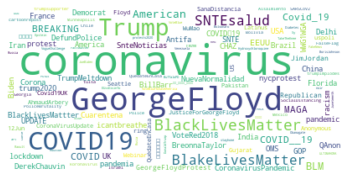

In [77]:
text = ""
for hashtag in shuffled_hashtags:
    text += (hashtag + " ")

wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
def plot_wordcloud(data_dict):
    wc = WordCloud(background_color='white', width=480, height=360)
    wc.fit_words(data_dict)
    return wc.to_image()

In [90]:
hashtag_counts_dict = dict(zip(hashtag_counts_df['hashtag'], hashtag_counts_df['count']))

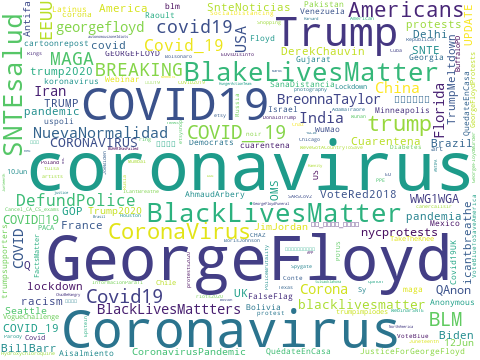

In [91]:
plot_wordcloud(hashtag_counts_dict)